In [1]:
import numpy as np
import pandas as pd

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data= pd.read_csv('https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
print(data.shape)
data.Class.value_counts()

(772, 31)


0    763
1      9
Name: Class, dtype: int64

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
# separate fraudulent and non fraudulent data
data_0 = data[data['Class'] == 0]
data_1 = data[data['Class'] == 1]

In [21]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

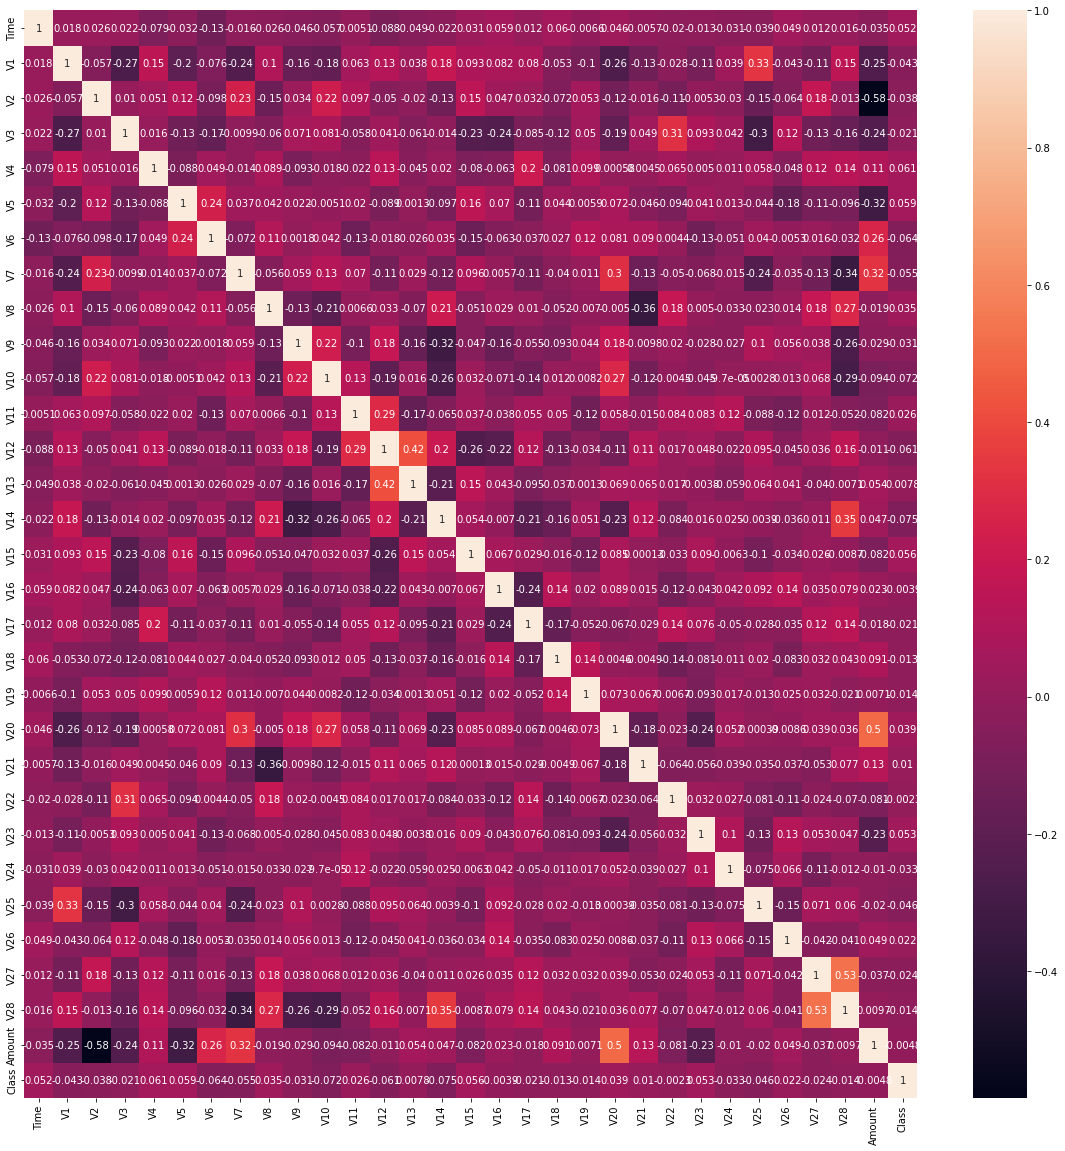

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [23]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

# check length of 1's and 0's
one = np.where(y==1)
zero = np.where(y==0)
len(one[0]), len(zero[0])

(9, 763)

In [24]:
#converting the data into balanced class dataset

# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target varaible
x_over, y_over = ros.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_over))

Original dataset shape Counter({0: 763, 1: 9})
Resample dataset shape Counter({0: 763, 1: 763})


In [25]:
df= pd.concat([x_over, y_over], axis= 1)
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [26]:
import math

# Population size
N = 763

# Estimated proportion of the population with the target characteristic
p = 0.5

# Margin of error
e = 0.05

# Confidence level
conf_level = 0.95

# Z-score for the confidence level
z_score = 1.96

# Sample size for Simple Random Sampling
n_srs = math.ceil((z_score**2 * p * (1-p)) / (e**2))

# Number of strata for Stratified Random Sampling
# Calculate the sample size using stratified sampling
strata_sizes = y_over.value_counts()
total_size = strata_sizes.sum()

# Sample size for Stratified Random Sampling
# Calculate the sample size using stratified sampling
strata_sizes = data["Class"].value_counts()
total_size = strata_sizes.sum()
n_strat = math.ceil((z_score**2 * p * (1-p) * total_size) / ((total_size - 1) * e**2 + z_score**2 * p * (1-p)))

# Number of clusters for Cluster Sampling
num_clusters = 10

# Sample size for Cluster Sampling
n_cluster = math.ceil((z_score**2 * p * (1-p) * num_clusters) / ((num_clusters - 1) * e**2 + z_score**2 * p * (1-p)))

# Sample size for Systematic Sampling
n_systematic = math.ceil(math.sqrt(N))

print("Sample Size for Simple Random Sampling: ", n_srs)
print("Sample Size for Stratified Random Sampling: ", n_strat)
print("Sample Size for Cluster Sampling: ", n_cluster)
print("Sample Size for Systematic Sampling: ", n_systematic)


Sample Size for Simple Random Sampling:  385
Sample Size for Stratified Random Sampling:  257
Sample Size for Cluster Sampling:  10
Sample Size for Systematic Sampling:  28


In [77]:
sample_srs= pd.DataFrame(df.sample(n=n_srs, random_state=0))
test_srs= df.merge(sample_srs, how = 'outer' ,indicator=True).query('_merge == "left_only"').drop('_merge', 1)


In [78]:
sample_systematic= pd.DataFrame(df.iloc[::n_systematic])
test_systematic= df.merge(sample_systematic, how = 'outer' ,indicator=True).query('_merge == "left_only"').drop('_merge', 1)



In [79]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit


# Define the target variable and the predictors
target = "Class"
predictors = [col for col in data.columns if col != target]

# Split the data into training and testing sets using stratified sampling
sss = StratifiedShuffleSplit(n_splits=1,  train_size=n_strat, random_state=42)
for train_index, _ in sss.split(data[predictors], data[target]):
    strat_data = pd.DataFrame(data.iloc[train_index])

test_strat= df.merge(strat_data, how = 'outer' ,indicator=True).query('_merge == "left_only"').drop('_merge', 1)


In [93]:
import random


cluster_size= math.ceil(N / n_cluster)
clusters = [data.iloc[i:i+cluster_size] for i in range(0, len(data), cluster_size)]

sample_cluster = (random.choice(clusters))

test_cluster= df.merge(sample_cluster, how = 'outer' ,indicator=True).query('_merge == "left_only"').drop('_merge', 1)


In [81]:
balanced_data = pd.concat([x_over, y_over], axis=1)

In [138]:
# define the models
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


models = {'M1': DecisionTreeClassifier(random_state=0),
    'M2': RandomForestClassifier(random_state=0),
    'M3': GradientBoostingClassifier(random_state=0),
    'M4': LogisticRegression(random_state=0),
    'M5': SVC(random_state=0)}

# define the samples
samples = {"Sampling 1": [sample_srs, test_srs],
            "Sampling 2": [sample_systematic, test_systematic],
            "Sampling 3": [strat_data, test_strat],
            "Sampling 4": [sample_cluster, test_cluster],
            "Sampling 5": 'None'}


In [95]:
sample_cluster['Class'].value_counts()

0    75
1     2
Name: Class, dtype: int64

In [158]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


results=pd.DataFrame(columns= [sampling_name for sampling_name, _ in samples.items()], index= [model_name for model_name, _ in models.items()])

for sampling_name, sampling in samples.items():
    for model_name, model in models.items():
        if sampling_name == 'Sampling 5':
            # no sampling
            X_train, X_test, y_train, y_test = train_test_split(balanced_data.drop('Class', axis=1), balanced_data['Class'], test_size=0.4)
        else:
            # apply sampling technique
            #X_resampled, y_resampled = sampling.fit_resample(balanced_data.drop('Class', axis=1), balanced_data['Class'])
            #X_train, X_test, y_train, y_test = train_test_split(sampling.drop('Class', axis=1), sampling['Class'], test_size=0.3, random_state=0)

            X_train, y_train = sampling[0].drop('Class', axis=1), sampling[0]['Class']
            X_test, y_test = sampling[1].drop('Class', axis=1), sampling[1]['Class']

        # fit model and make predictions
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # print classification report and accuracy
        score = accuracy_score(y_test, y_pred)
        results.loc[model_name,sampling_name] = score




In [159]:
results

,Sampling 1,Sampling 2,Sampling 3,Sampling 4,Sampling 5
M1,0.97491,0.867486,0.490099,0.49375,0.991817
M2,0.991039,0.967213,0.5,0.5375,0.998363
M3,0.987455,0.920765,0.489109,0.513281,0.993453
M4,0.822581,0.782787,0.49703,0.454688,0.929624
M5,0.715054,0.758197,0.5,0.5375,0.695581
